In [1]:
import numpy as np
import random
import networkx as nx
import os
from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt
import random
import time
import os

In [2]:


def create_binary_adjacency_matrix(num_tasks):
    matrix = np.zeros((num_tasks, num_tasks), dtype=int)
    
    # Generate dependencies for each task
    for i in range(num_tasks):
        if i == 0:
            continue  # Skip the first task as it will be the start node
        num_dependencies = random.randint(1, min(3, i))  # Ensure at least one dependency
        dependencies = random.sample(range(i), num_dependencies)
        
        for dependency in dependencies:
            matrix[i, dependency] = 1
    
    # Connect start node (first task) to random tasks
    start_node_dependencies = random.sample(range(1, num_tasks), random.randint(0, min(3, num_tasks-1)))
    for dependency in start_node_dependencies:
        matrix[0, dependency] = 1
    
    # Connect random tasks to finish node (last task)
    finish_node_dependencies = random.sample(range(num_tasks-1), random.randint(0, min(3, num_tasks-1)))
    for dependency in finish_node_dependencies:
        matrix[dependency, num_tasks-1] = 1
    
    return matrix

def write_matrix(matrix, file_name):
    
    # Tạo đường dẫn đến tệp tin
    file_path = os.path.join(FOLDER_NAME, file_name)

    # Ghi ma trận vào tệp tin
    with open(file_path, 'w') as f:
        rows, cols = matrix.shape
        for i in range(rows):
            for j in range(cols):
                if j != cols -1:
                    f.write(str(matrix[i, j]) + ' ')
                else:
                    f.write(str(matrix[i, j]))

            if i != rows - 1:
                f.write('\n')

    return file_path


def save_pert_chart(TaskAdjacency):
    graph = nx.DiGraph()

    for i in range(len(TaskAdjacency)):
        graph.add_node(i)
        predencors = TaskAdjacency[i]
        for j in range(len(predencors)):
            if predencors[j] == 1:
                graph.add_edge(j, i)


    pos = graphviz_layout(graph, prog="dot")
    for k,v in pos.items():
        pos[k]=(-v[1],v[0])
    nx.draw_networkx_nodes(graph,pos = pos, node_shape = 's', node_size = 200, 
                        node_color = 'none', edgecolors='k')
    nx.draw_networkx_edges(graph,pos = pos, 
                        node_shape = 's', width = 1,  node_size = 200)
    nx.draw_networkx_labels(graph,pos = pos, font_size = 5)

    
    # Set up the figure size
    plt.figure(figsize=(10, 2))

    plt.savefig(f"{FOLDER_NAME}/pert.png")
    # Display the heatmap
    plt.show()


/var/folders/rn/hgwpqjn159ng5gy4gt_0wff40000gn/T/ipykernel_5530/3589542163.py:54: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(graph, prog="dot")


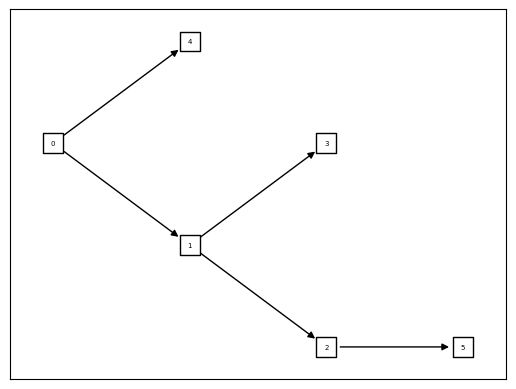

<Figure size 1000x200 with 0 Axes>

In [3]:


def generate_skill(num_skill, num_tasks):
    # Tạo ma trận TaskAdjacency với giá trị mặc định là 0 cho tất cả các cặp task
    task_skill = np.zeros((num_tasks, num_skill), dtype=int)

    # Đặt giá trị ngẫu nhiên (0 hoặc 1) cho các cặp task từ task 1 đến task 98
    for i in range(1, num_tasks - 1):
        task_skill[i] = np.random.randint(0, 6, size=num_skill)

    write_matrix(task_skill, file_name = "skill.txt")
    

def generate_duration(num_tasks):
    import random

    # Tạo ma trận TaskAdjacency với giá trị mặc định là 0 cho tất cả các cặp task
    task_duration = [random.randint(1, 10) for _ in range(0, num_tasks) ]
    task_duration[0] = 0
    task_duration[-1] = 0
    write_matrix(np.array([task_duration]), file_name = "duration.txt")

def generate_predence_matrix(num_tasks):
    # Tạo đồ thị DAG ngẫu nhiên
    graph = {}
    for i in range(1, num_tasks):
        dependencies = random.sample(range(i), random.randint(1, i))
        graph[i] = dependencies

    # Kiểm tra tính chu trình trong đồ thị
    stack = []
    visited = set()
    for node in range(num_tasks):
        if node not in visited:
            if has_cycle(graph, node, visited, stack):
                return None

    # Tạo ma trận predence task
    matrix = np.zeros((num_tasks, num_tasks), dtype=int)
    for task, dependencies in graph.items():
        for dependency in dependencies:
            matrix[task, dependency] = 1

    # Xóa cạnh trực tiếp từ node A đến node C nếu có cạnh từ node A đến node B và từ node B đến node C
    for i in range(num_tasks):
        for j in range(num_tasks):
            if matrix[i, j] == 1:
                for k in range(num_tasks):
                    if matrix[j, k] == 1:
                        matrix[i, k] = 0
    
    write_matrix(matrix, file_name = "task_matrix.txt")
    save_pert_chart(matrix)
    return matrix

def has_cycle(graph, node, visited, stack):
    visited.add(node)
    stack.append(node)

    for neighbor in graph.get(node, []):
        if neighbor not in visited:
            if has_cycle(graph, neighbor, visited, stack):
                return True
        elif neighbor in stack:
            return True

    stack.remove(node)
    return False


# Số lượng công việc
num_tasks =  6
num_skill = 5

# Tạo tên thư mục duy nhất dựa trên thời gian
FOLDER_NAME = str(int(time.time()))
os.makedirs(FOLDER_NAME, exist_ok=True)

generate_duration (num_tasks)
generate_skill(num_skill = num_skill, num_tasks = num_tasks)
matrix = generate_predence_matrix(num_tasks)